In [1]:
import numpy as np
from scipy.spatial.distance import cdist
#from scipy.stats import mode
from sklearn.neighbors import KNeighborsClassifier

In [2]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
digits = load_digits()

In [3]:
with open('mnist-y.data') as file:
    chars = [line[0] for line in file]

In [4]:
vectors = []
with open('mnist-x.data') as file:
    for line in file:
        vectors.append([1.0 if float(v) == 1 else -1.0 for v in line.strip().split(',')])

<Figure size 640x480 with 0 Axes>

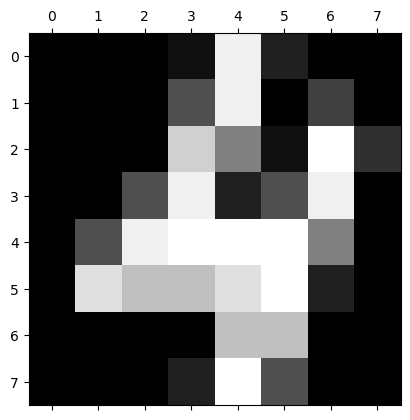

In [14]:
import matplotlib.pyplot as plt
plt.gray()
plt.matshow(digits.images[1001])
plt.show()

# KNN

In [5]:
digits['data'] = np.where(digits['data']>0,1,-1)

In [6]:
vectors = np.array(vectors)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(vectors,chars,test_size=0.20, random_state=42)

In [10]:
X_train.shape

(4800, 784)

In [11]:
X_test.shape

(1200, 784)

In [24]:
def predict(test_point, k=1):
    distances = []
    
    # Calculate Euclidean distances 
    for i in range(len(X_train)):
        distance = np.sqrt(np.sum(np.square(X_train[i] - test_point)))
        distances.append((distance, y_train[i]))
    
    # Sort the distances and select the k nearest neighbors
    distances.sort()
    neighbors = [d[1] for d in distances[:k]]
    
    # Count the frequency of each class among the neighbors
    counts = np.bincount(neighbors)
    
    # Return the class with the highest frequency
    return np.argmax(counts)

In [20]:
def test():
    success = 0
    examples = X_test
    for e in range(len(examples)):
        z = predict(examples[e])
        if z == y_test[e]:
            success += 1
    return float(success) / len(examples)

In [25]:
accuracy = test()
print(f"Classification accuracy: {accuracy:.4f}")

Classification accuracy: 0.0000


In [8]:
#veamos un paquete
def predict2(test_point,k=5):
    knn = KNeighborsClassifier(n_neighbors=k)
  
    knn.fit(X_train, y_train)
    test_point = test_point.reshape(1, -1)

    return(knn.predict(test_point))

In [10]:
def test2():
    success = 0
    examples = X_test
    for e in range(len(examples)):
        z = predict2(examples[e])
        if z == y_test[e]:
            success += 1
    return float(success) / len(examples)

In [11]:
accuracy = test2()
print(f"Classification accuracy: {accuracy:.4f}")

c:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

Classification accuracy: 0.9233


c:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

c:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

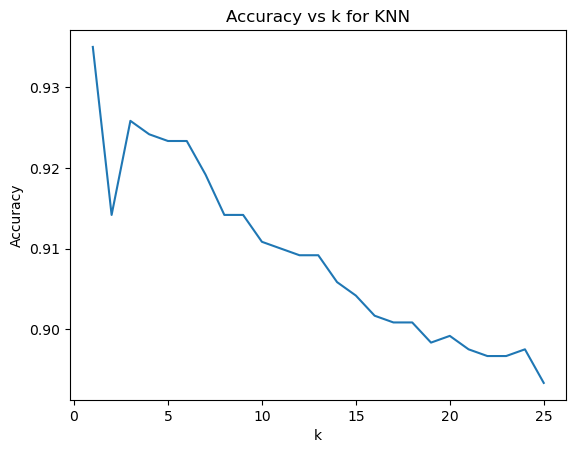

Best k value: 1


In [17]:
k_values = range(1, 26)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracy = knn.score(X_test, y_test)
    accuracies.append(accuracy)

plt.plot(k_values, accuracies)
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("Accuracy vs k for KNN")
plt.show()

best_k = k_values[accuracies.index(max(accuracies))]
print("Best k value:", best_k)

## Prostate

In [ ]:
import pandas as pd

In [ ]:
prostate_data = pd.read_csv('prostate.csv')

In [ ]:
#Divide the data set, and apply the K-NN. Test the accuracy, the training error, and the test error.

# Perceptron

In [ ]:
data = [{'vector': v, 'char': c} for (v, c) in zip(vectors, chars)]

In [ ]:
def train(target_char, opposite_char, steps):
    train_data = data[:5000]
    train_data = [e for e in train_data if e['char'] in (target_char, opposite_char)]
    w = np.zeros(784)
    i = 0
    weights = w
    # Implement perceptron, remember:
    if z >= 0 and y == opposite_char:
        #TODO
    elif z < 0 and y == target_char:
        #TODO
    return w

def error(target_char, opposite_char,data,w):
    success = 0
    for e in data:
        z = np.dot(e['vector'], w)
        if (z >= 0 and e['char'] == target_char) or (z < 0 and e['char'] == opposite_char):
            success += 1
    return float(success) / len(data)

def test(target_char, opposite_char,weights):
    success = 0
    examples = data[5000:]

    examples = [e for e in examples if e['char'] in (target_char, opposite_char)]

    for e in examples:
        z = np.dot(e['vector'], weights)
        if (z >= 0 and e['char'] == target_char) or (z < 0 and e['char'] == opposite_char):
            success += 1

    return float(success) / len(examples)

In [ ]:
weights = train('1','2',100)

In [ ]:
test('1','2',weights)